In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime as dt

In [2]:
df = pd.read_csv('crmbase.csv', sep = ';', decimal=',', encoding= 'unicode_escape')

In [3]:
df.head()

,MONTH,YEAR,DATE,BRAND,ACTIVE,INACTIVE,TOTAL CLIENTS,HYBRIDS,HYBRIDS RATE TARGET,REPURCHASE RATE,...,AGELESS,ACTIVE ONLINE,INACTIVE ONLINE,TOTAL CLIENTS ONLINE,REPURCHASE RATE ONLINE,NPS ONLINE,NPS ONLINE TARGET,NEW CUSTOMERS ONLINE,UTP ONLINE,AGELESS ONLINE
0,JAN,FY20,01/01/2020,Brand 1,25883,49896,75779,6292,0.02,0.31,...,0.34,12658.0,18468.0,31126,0.12,79.0,91.0,818,1.76,0.26
1,FEB,FY20,01/02/2020,Brand 1,29773,28782,58555,4201,0.02,0.31,...,0.35,14569.0,22108.0,36677,0.12,76.0,77.0,376,1.97,0.28
2,MAR,FY20,01/03/2020,Brand 1,19525,10134,29659,4060,0.02,0.30,...,0.30,25847.0,11953.0,37800,0.12,73.0,94.0,839,1.63,0.18
3,APR,FY20,01/04/2020,Brand 1,30610,22628,53238,3213,0.02,0.29,...,0.23,14293.0,32521.0,46814,0.11,78.0,79.0,292,1.88,0.19
4,MAY,FY20,01/05/2020,Brand 1,59646,34453,94099,3533,0.02,0.28,...,0.28,26897.0,16004.0,42901,0.10,67.0,84.0,398,1.90,0.22


In [4]:
df.dtypes

MONTH                      object
YEAR                       object
DATE                       object
BRAND                      object
ACTIVE                      int64
INACTIVE                    int64
TOTAL CLIENTS               int64
HYBRIDS                     int64
HYBRIDS RATE TARGET       float64
REPURCHASE RATE           float64
REPURCHASE RATE TARGET    float64
NPS FSS                     int64
NPS FSS TARGET              int64
NEW CUSTOMERS               int64
UTP                       float64
AGELESS                   float64
ACTIVE ONLINE             float64
INACTIVE ONLINE           float64
TOTAL CLIENTS ONLINE        int64
REPURCHASE RATE ONLINE    float64
NPS ONLINE                float64
NPS ONLINE TARGET         float64
NEW CUSTOMERS ONLINE        int64
UTP ONLINE                float64
AGELESS ONLINE            float64
dtype: object

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'].astype('string'))
df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')

In [6]:
df['HYBRIDS RATE TARGET'] = round((df['HYBRIDS RATE TARGET']*100), 2)
df['REPURCHASE RATE'] = round((df['REPURCHASE RATE']*100), 2)
df['REPURCHASE RATE TARGET'] = round((df['REPURCHASE RATE TARGET']*100), 2)
df['REPURCHASE RATE ONLINE'] = round((df['REPURCHASE RATE ONLINE']*100), 2)
df['AGELESS'] = round((df['AGELESS']*100), 2)
df['AGELESS ONLINE'] = round((df['AGELESS ONLINE']*100), 2)

In [7]:
df.dtypes

MONTH                      object
YEAR                       object
DATE                       object
BRAND                      object
ACTIVE                      int64
INACTIVE                    int64
TOTAL CLIENTS               int64
HYBRIDS                     int64
HYBRIDS RATE TARGET       float64
REPURCHASE RATE           float64
REPURCHASE RATE TARGET    float64
NPS FSS                     int64
NPS FSS TARGET              int64
NEW CUSTOMERS               int64
UTP                       float64
AGELESS                   float64
ACTIVE ONLINE             float64
INACTIVE ONLINE           float64
TOTAL CLIENTS ONLINE        int64
REPURCHASE RATE ONLINE    float64
NPS ONLINE                float64
NPS ONLINE TARGET         float64
NEW CUSTOMERS ONLINE        int64
UTP ONLINE                float64
AGELESS ONLINE            float64
dtype: object

In [8]:
def calc_Hybrids(register):
    try:
        i = round((register['HYBRIDS']/register['ACTIVE']*100),2)
        return i
    except ZeroDivisionError:
        print(0)
    
df['HYBRIDS RATE'] = df.apply(calc_Hybrids, axis=1)

In [9]:
df.head()

,MONTH,YEAR,DATE,BRAND,ACTIVE,INACTIVE,TOTAL CLIENTS,HYBRIDS,HYBRIDS RATE TARGET,REPURCHASE RATE,...,ACTIVE ONLINE,INACTIVE ONLINE,TOTAL CLIENTS ONLINE,REPURCHASE RATE ONLINE,NPS ONLINE,NPS ONLINE TARGET,NEW CUSTOMERS ONLINE,UTP ONLINE,AGELESS ONLINE,HYBRIDS RATE
0,JAN,FY20,01/01/2020,Brand 1,25883,49896,75779,6292,2.0,31.0,...,12658.0,18468.0,31126,12.0,79.0,91.0,818,1.76,26.0,24.31
1,FEB,FY20,01/02/2020,Brand 1,29773,28782,58555,4201,2.0,31.0,...,14569.0,22108.0,36677,12.0,76.0,77.0,376,1.97,28.0,14.11
2,MAR,FY20,01/03/2020,Brand 1,19525,10134,29659,4060,2.0,30.0,...,25847.0,11953.0,37800,12.0,73.0,94.0,839,1.63,18.0,20.79
3,APR,FY20,01/04/2020,Brand 1,30610,22628,53238,3213,2.0,29.0,...,14293.0,32521.0,46814,11.0,78.0,79.0,292,1.88,19.0,10.50
4,MAY,FY20,01/05/2020,Brand 1,59646,34453,94099,3533,2.0,28.0,...,26897.0,16004.0,42901,10.0,67.0,84.0,398,1.90,22.0,5.92


In [10]:
lst1 = ['Brand 1']

df_brand1 = df.loc[df['BRAND'].isin(lst1)]

In [11]:
df_brand1_1 = df_brand1[['DATE','NEW CUSTOMERS','REPURCHASE RATE','UTP','HYBRIDS RATE' ,'AGELESS']]
df_brand1_1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,52
DATE,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020,01/01/2021,01/02/2021
NEW CUSTOMERS,14026,11205,8336,2191,1349,4284,3258,6991,8601,9462,16823,17655,7910,5468
REPURCHASE RATE,31,31,30,29,28,26,25,25,24,23,22,22,22,21
UTP,2.05,2.08,2.02,1.94,2.07,2.11,2.23,2.21,2.28,2.35,2.46,2.14,2.43,2.17
HYBRIDS RATE,24.31,14.11,20.79,10.5,5.92,8.39,6.35,6.95,8.54,8.78,11.23,10.13,6.96,17.4
AGELESS,34,35,30,23,28,26,28,30,30,30,28,28,31,30


In [12]:
df_brand1_2 = df_brand1[['DATE','NEW CUSTOMERS ONLINE','REPURCHASE RATE ONLINE','UTP ONLINE', 'AGELESS ONLINE']]
df_brand1_2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,52
DATE,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020,01/01/2021,01/02/2021
NEW CUSTOMERS ONLINE,818,376,839,292,398,863,678,710,356,941,517,613,421,226
REPURCHASE RATE ONLINE,12,12,12,11,10,10,10,12,12,12,13,14,15,15
UTP ONLINE,1.76,1.97,1.63,1.88,1.9,1.98,2.11,2.42,2.6,2.44,2.69,2.65,2.84,3.01
AGELESS ONLINE,26,28,18,19,22,17,23,25,27,28,25,27,29,32


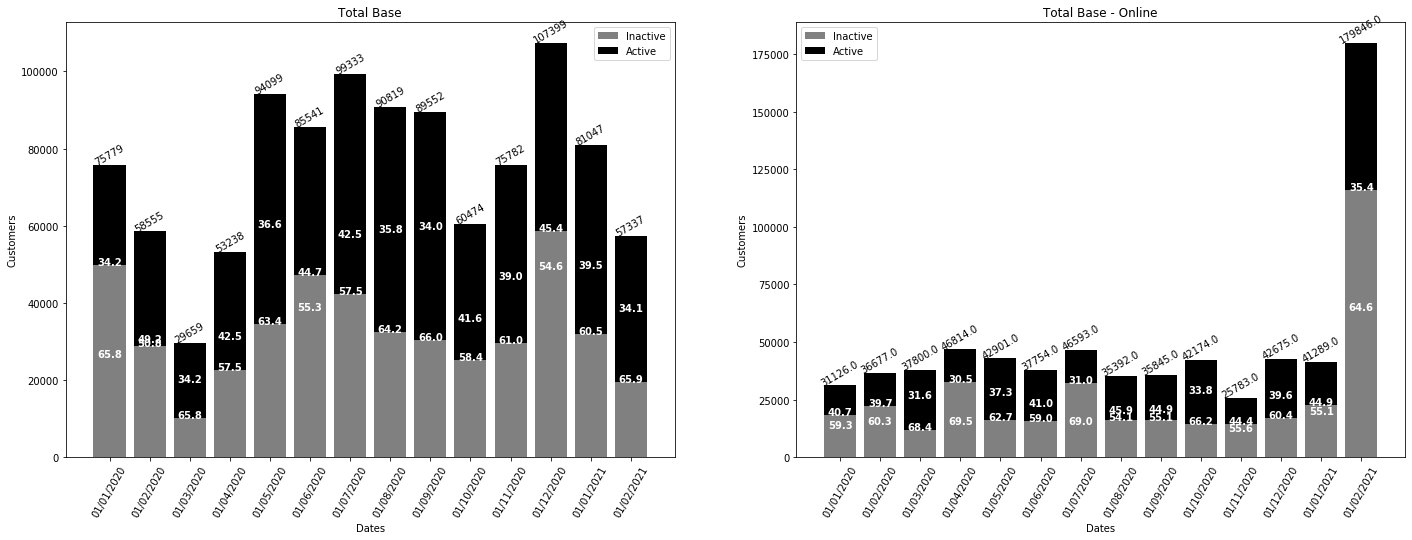

In [13]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.bar(df_brand1['DATE'], df_brand1['INACTIVE'], label='Inactive', color='gray')
plt.bar(df_brand1['DATE'], df_brand1['ACTIVE'], bottom = df_brand1['INACTIVE'], label='Active', color='black')
plt.title('Total Base')
plt.xlabel('Dates')
plt.ylabel('Customers')
plt.legend()
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=10)
for x, y, z in zip(df_brand1['DATE'], df_brand1['INACTIVE'], df_brand1['ACTIVE']): 
    label = round((y + z),0)
    plt.text(x, label, label, ha='center', fontsize=10, rotation=30,)
for x, y, z in zip(df_brand1['DATE'], df_brand1['INACTIVE'],df_brand1['ACTIVE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10, va='baseline', fontweight='bold')
for x, y, z in zip(df_brand1['DATE'], df_brand1['ACTIVE'], df_brand1['INACTIVE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10, va='baseline', fontweight='bold')


plt.subplot(1,2,2)
plt.bar(df_brand1['DATE'], df_brand1['INACTIVE ONLINE'], label='Inactive', color='gray')
plt.bar(df_brand1['DATE'], df_brand1['ACTIVE ONLINE'], bottom = df_brand1['INACTIVE ONLINE'], label='Active', color='black')
plt.title('Total Base - Online')
plt.xlabel('Dates')
plt.ylabel('Customers')
plt.legend()
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=10)
for x, y, z in zip(df_brand1['DATE'], df_brand1['INACTIVE ONLINE'], df_brand1['ACTIVE ONLINE']): 
    label = round((y + z),0)
    plt.text(x, label, label, ha='center', fontsize=10, rotation=30)
    
for x, y, z in zip(df_brand1['DATE'], df_brand1['INACTIVE ONLINE'], df_brand1['ACTIVE ONLINE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10, va='baseline', fontweight='bold')
    
for x, y, z in zip(df_brand1['DATE'], df_brand1['ACTIVE ONLINE'],df_brand1['INACTIVE ONLINE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10, va='baseline', fontweight='bold')
plt.show()

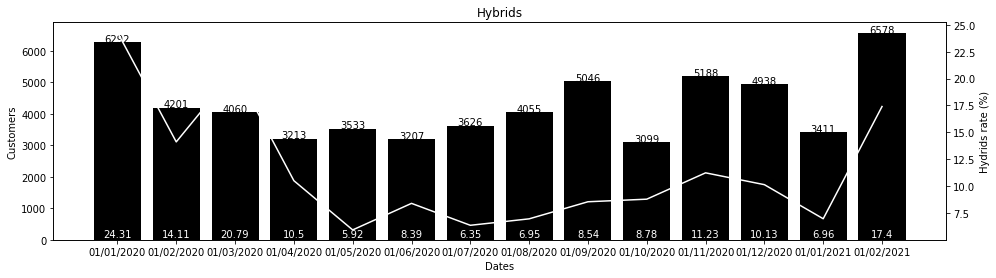

In [14]:
fig, ax = plt.subplots(figsize=(16,4))

ax.bar(df_brand1['DATE'], df_brand1['HYBRIDS'], color='black')
ax.set_title('Hybrids')
ax.set_xlabel('Dates')
ax.set_ylabel('Customers')
for x, y in zip(df_brand1['DATE'], df_brand1['HYBRIDS']):                                       
    label = y
    ax.annotate(label, (x,y), textcoords="data", ha='center')

ax2 = ax.twinx()

ax2.plot(df_brand1['DATE'], df_brand1['HYBRIDS RATE'], color='white')
ax2.set_ylabel('Hydrids rate (%)')
for x, y in zip(df_brand1['DATE'], df_brand1['HYBRIDS RATE']):                                       
    label = y
    ax.annotate(label, (x,y), textcoords="data", color='white', ha='center', va='bottom')

plt.show()

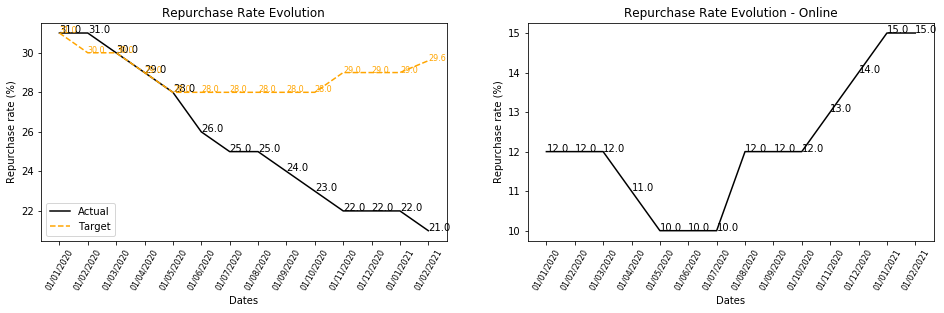

In [16]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(df_brand1['DATE'], df_brand1['REPURCHASE RATE'], color='black', label='Actual')
plt.plot(df_brand1['DATE'], df_brand1['REPURCHASE RATE TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('Repurchase Rate Evolution')
plt.xlabel('Dates')
plt.ylabel('Repurchase rate (%)')
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand1['DATE'], df_brand1['REPURCHASE RATE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand1['DATE'], df_brand1['REPURCHASE RATE TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data", fontsize=8, color='orange')

plt.subplot(1,2,2)
plt.plot(df_brand1['DATE'], df_brand1['REPURCHASE RATE ONLINE'], color='black')
plt.title('Repurchase Rate Evolution - Online')
plt.xlabel('Dates')
plt.ylabel('Repurchase rate (%)')
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=8)
for x, y in zip(df_brand1['DATE'], df_brand1['REPURCHASE RATE ONLINE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
plt.show()

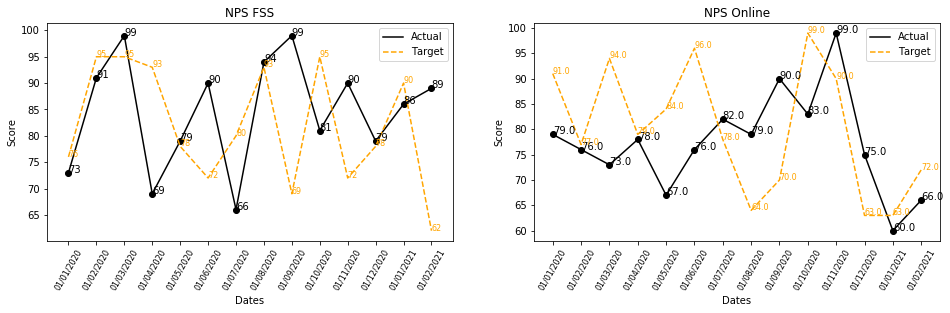

In [17]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(df_brand1['DATE'], df_brand1['NPS FSS'], color='black', label='Actual')
plt.scatter(df_brand1['DATE'], df_brand1['NPS FSS'], color='black')
plt.plot(df_brand1['DATE'], df_brand1['NPS FSS TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('NPS FSS')
plt.xlabel('Dates')
plt.ylabel('Score')
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand1['DATE'], df_brand1['NPS FSS']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand1['DATE'], df_brand1['NPS FSS TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data", fontsize=8, color='orange')                 

plt.subplot(1,2,2)
plt.scatter(df_brand1['DATE'], df_brand1['NPS ONLINE'], color='black')
plt.plot(df_brand1['DATE'], df_brand1['NPS ONLINE'], color='black', label='Actual')
plt.plot(df_brand1['DATE'], df_brand1['NPS ONLINE TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('NPS Online')
plt.xlabel('Dates')
plt.ylabel('Score')
plt.xticks(df_brand1['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand1['DATE'], df_brand1['NPS ONLINE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand1['DATE'], df_brand1['NPS ONLINE TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data", fontsize=8, color='orange')
plt.show()

In [18]:
lst2 = ['Brand 2']

df_brand2 = df.loc[df['BRAND'].isin(lst2)]

In [19]:
df_brand2_1 = df_brand2[['DATE','NEW CUSTOMERS','REPURCHASE RATE', 'HYBRIDS RATE','UTP', 'AGELESS']]
df_brand2_1.T

,13,14,15,16,17,18,19,20,21,22,23,24,25,53
DATE,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020,01/01/2021,01/02/2021
NEW CUSTOMERS,1710,1207,902,526,844,935,1028,674,603,1163,2945,1667,1073,764
REPURCHASE RATE,27,26,26,25,24,22,22,21,21,21,20,21,20,20
HYBRIDS RATE,17.73,30.9,31.96,11.14,7.57,12.45,17.09,7.31,60.52,12.51,19.06,46.59,16.14,17.3
UTP,2.29,2.21,2.08,1.57,1.96,1.95,1.96,2.16,2.24,2.38,2.98,2.32,2.33,2.41
AGELESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,51,55,54,59


In [23]:
df_brand2_2= df_brand2[['DATE','NEW CUSTOMERS ONLINE','REPURCHASE RATE ONLINE','UTP ONLINE', 'AGELESS ONLINE']]
df_brand2_2.T

,13,14,15,16,17,18,19,20,21,22,23,24,25,53
DATE,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020,01/01/2021,01/02/2021
NEW CUSTOMERS ONLINE,301,441,416,473,748,886,514,524,788,763,982,974,909,494
REPURCHASE RATE ONLINE,14,14,12,12,11,11,11,11,11,11,11,12,12,13
UTP ONLINE,1.72,1.91,1.58,1.53,1.82,1.73,1.73,1.77,2.17,2.46,3.42,2.69,2.41,2.91
AGELESS ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,39,40,41,58


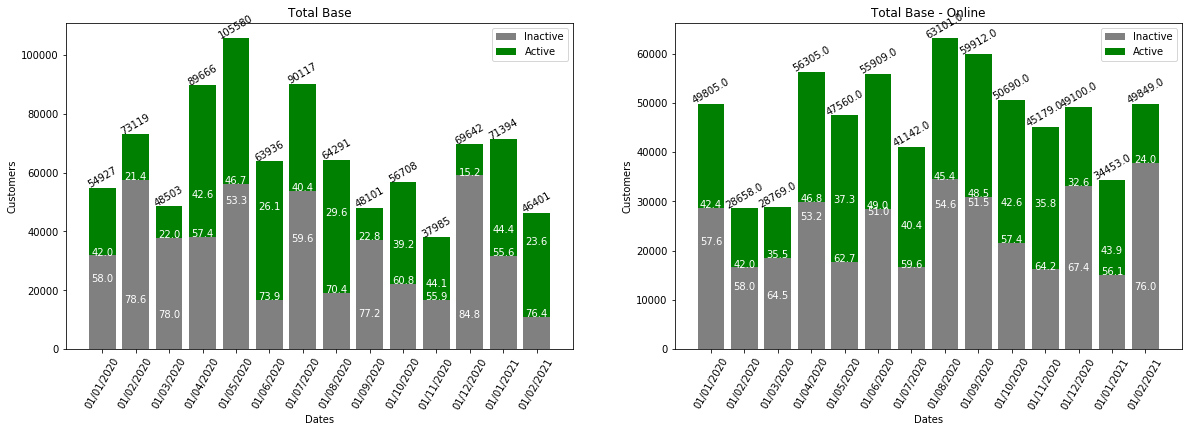

In [24]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.bar(df_brand2['DATE'], df_brand2['INACTIVE'], label='Inactive', color='gray')
plt.bar(df_brand2['DATE'], df_brand2['ACTIVE'], bottom = df_brand2['INACTIVE'], label='Active', color='green')
plt.title('Total Base')
plt.xlabel('Dates')
plt.ylabel('Customers')
plt.legend()
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=10)
for x, y, z in zip(df_brand2['DATE'], df_brand2['INACTIVE'], df_brand2['ACTIVE']):                                       
    label = (y + z)
    plt.text(x,label, label, ha='center', fontsize=10, rotation=30)
for x, y, z in zip(df_brand2['DATE'], df_brand2['INACTIVE'], df_brand2['ACTIVE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10)
for x, y, z in zip(df_brand2['DATE'], df_brand2['ACTIVE'],df_brand2['INACTIVE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10)

plt.subplot(1,2,2)
plt.bar(df_brand2['DATE'], df_brand2['INACTIVE ONLINE'], label='Inactive', color='gray')
plt.bar(df_brand2['DATE'], df_brand2['ACTIVE ONLINE'], bottom = df_brand2['INACTIVE ONLINE'], label='Active', color='green')
plt.title('Total Base - Online')
plt.xlabel('Dates')
plt.ylabel('Customers')
plt.legend()
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=10)
for x, y, z in zip(df_brand2['DATE'], df_brand2['INACTIVE ONLINE'], df_brand2['ACTIVE ONLINE']):                                       
    label = (y + z)
    plt.text(x,label, label, ha='center', fontsize=10, rotation=30)
for x, y, z in zip(df_brand2['DATE'], df_brand2['INACTIVE ONLINE'], df_brand2['ACTIVE ONLINE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10)
for x, y, z in zip(df_brand2['DATE'], df_brand2['ACTIVE ONLINE'], df_brand2['INACTIVE ONLINE']):                                       
    label = round((1-(y/(y + z)))*100, 1)
    plt.annotate(label, (x,y), textcoords="data", ha='center', color='white', fontsize=10)
plt.show()

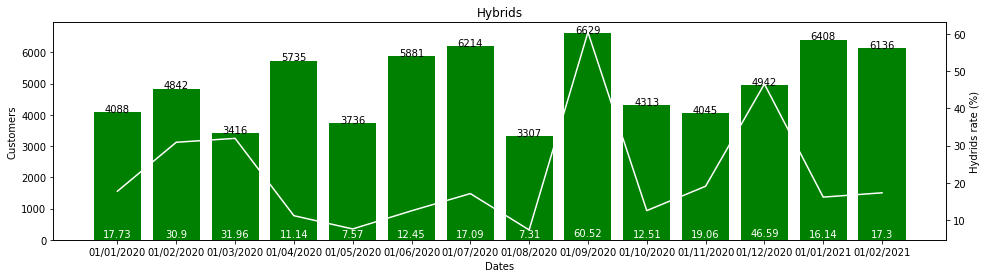

In [25]:
fig, ax = plt.subplots(figsize=(16,4))

ax.bar(df_brand2['DATE'], df_brand2['HYBRIDS'], color='green')
ax.set_title('Hybrids')
ax.set_xlabel('Dates')
ax.set_ylabel('Customers')
for x, y in zip(df_brand2['DATE'], df_brand2['HYBRIDS']):                                       
    label = y
    ax.annotate(label, (x,y), textcoords="data", ha='center')

ax2 = ax.twinx()

ax2.plot(df_brand2['DATE'], df_brand2['HYBRIDS RATE'], color='white')
ax2.set_ylabel('Hydrids rate (%)')
for x, y in zip(df_brand2['DATE'], df_brand2['HYBRIDS RATE']):                                       
    label = y
    ax.annotate(label, (x,y), textcoords="data", color='white', ha='center', va='bottom')

plt.show()

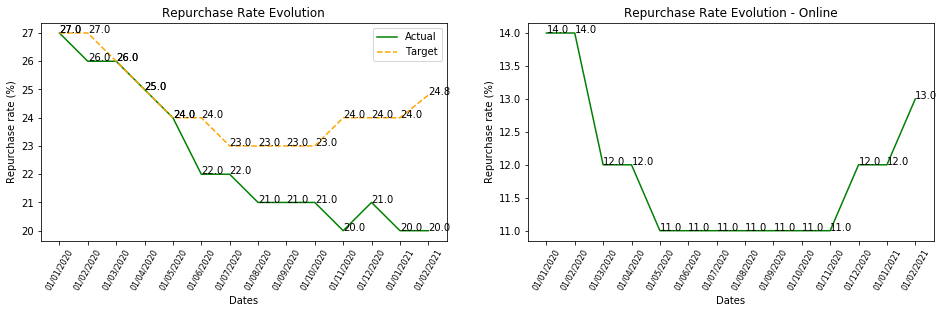

In [26]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(df_brand2['DATE'], df_brand2['REPURCHASE RATE'], color='green', label='Actual')
plt.plot(df_brand2['DATE'], df_brand2['REPURCHASE RATE TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('Repurchase Rate Evolution')
plt.xlabel('Dates')
plt.ylabel('Repurchase rate (%)')
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand2['DATE'], df_brand2['REPURCHASE RATE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand2['DATE'], df_brand2['REPURCHASE RATE TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
    
plt.subplot(1,2,2)
plt.plot(df_brand2['DATE'], df_brand2['REPURCHASE RATE ONLINE'], color='green')
plt.title('Repurchase Rate Evolution - Online')
plt.xlabel('Dates')
plt.ylabel('Repurchase rate (%)')
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=8)
for x, y in zip(df_brand2['DATE'], df_brand2['REPURCHASE RATE ONLINE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
plt.show()

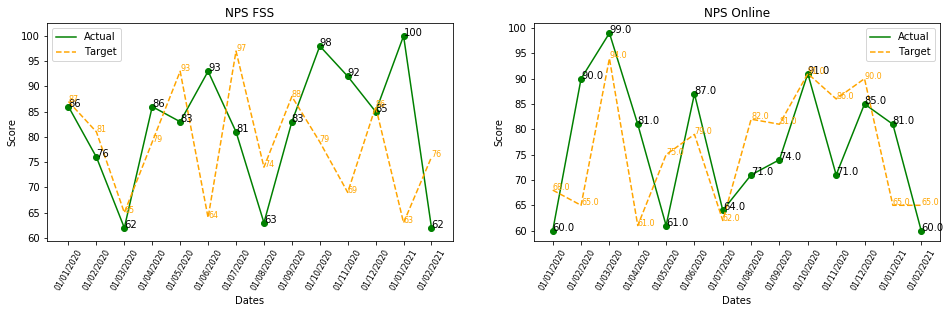

In [29]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(df_brand2['DATE'], df_brand2['NPS FSS'], color='green', label='Actual')
plt.scatter(df_brand2['DATE'], df_brand2['NPS FSS'], color='green')
plt.plot(df_brand2['DATE'], df_brand2['NPS FSS TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('NPS FSS')
plt.xlabel('Dates')
plt.ylabel('Score')
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand2['DATE'], df_brand2['NPS FSS']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand2['DATE'], df_brand2['NPS FSS TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data",fontsize=8, color='orange')                

plt.subplot(1,2,2)
plt.scatter(df_brand2['DATE'], df_brand2['NPS ONLINE'], color='green')
plt.plot(df_brand2['DATE'], df_brand2['NPS ONLINE'], color='green', label = 'Actual')
plt.plot(df_brand2['DATE'], df_brand2['NPS ONLINE TARGET'], color = 'orange', ls='dashed', label='Target')
plt.title('NPS Online')
plt.xlabel('Dates')
plt.ylabel('Score')
plt.xticks(df_brand2['DATE'], rotation=60, fontsize=8)
plt.legend()
for x, y in zip(df_brand2['DATE'], df_brand2['NPS ONLINE']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data")
for x, y in zip(df_brand2['DATE'], df_brand2['NPS ONLINE TARGET']):                                       
    label = y
    plt.annotate(label, (x,y), textcoords="data", fontsize=8, color='orange')
plt.show()